### Run Same ANN on mxnet
compiled to use GPU on my GTX 770 CUDA 3.0 machine

Remember to write to ~/.keras/keras.json as below:
```json
{
    "backend": "mxnet",
    "image_data_format": "channels_first"
}
```

In [1]:
# if not using tensorflow, import keras
import os
import numpy as np
import keras
#from tensorflow import keras

print('keras version:', keras.__version__, ', keras backend:', keras.backend.backend(), ', image format:', keras.backend.image_data_format())

Using MXNet backend


keras version: 2.2.4.1 , keras backend: mxnet , image format: channels_first


In [2]:
# this is the magic that will display matplotlib on the jupyter notebook
%matplotlib inline
from matplotlib import pyplot as plt

# flag to keep track of how we will change the format
is_channels_first = (keras.backend.image_data_format() == 'channels_first')


In [3]:
# get mnist data
mnist = keras.datasets.mnist

print('loading MNIST data...')
# loads the data only if for the first time
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#show the "shape" of downloaded data
print('train data size:', x_train.shape)
print('train label (expected) value size:', y_train.shape)
print('test data size:', x_test.shape)
print('test expected value:',y_test.shape)

loading MNIST data...
train data size: (60000, 28, 28)
train label (expected) value size: (60000,)
test data size: (10000, 28, 28)
test expected value: (10000,)




displaying few training samples


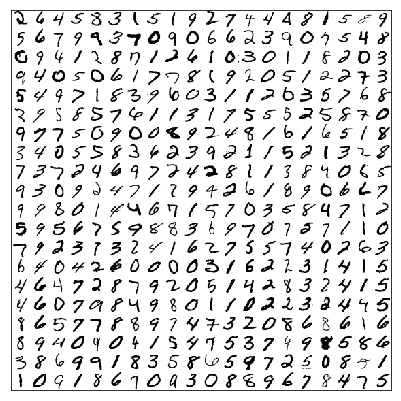

In [4]:
print('\n\ndisplaying few training samples')

#function to copy 1 mage to larger image map
def copy_image(target , ty, tx, src):
    for y in range(28):
        for x in range(28):
            target[ty*28+y][tx*28+x] = src[y][x]
    return target

# show 20 x 20
ysize = 20
xsize = 20
start_offset = 0
base_index = start_offset + (ysize * xsize)

image = np.zeros((28*ysize, 28*xsize), dtype=np.int)

for y in range(ysize):
    for x in range(xsize):
        index = y*xsize + x
        src = x_train[index + base_index]
        image = copy_image(image , y ,x , src)

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image , cmap='gray_r')
plt.show()
plt.close()

### The Artificial Neural Network will implement 1 input layer, 1 hiden layer, and 1 output layer
Since the data is in 28x28, we will convert that into a "flat" 28x28 => 784 array and convert 0-255 integers into 0.0 - 1.0 values (i.e. normalize the data )

And we will "hot encode" single label to be 10 digit array



In [5]:
x_train_reshaped = x_train.reshape(x_train.shape[0],784)
x_test_reshaped = x_test.reshape(x_test.shape[0], 784)

x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

x_train_reshaped /= 255.0
x_test_reshaped /= 255.0

y_hot_train = keras.utils.to_categorical(y_train, num_classes=10)
y_hot_test = keras.utils.to_categorical(y_test, num_classes=10)

print('x_train_reshaped:', x_train_reshaped.shape)
print('x_test_reshaped:', x_test_reshaped.shape)
print('y_hot_train:', y_hot_train.shape)
print('y_hot_test:', y_hot_test.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)
y_hot_train: (60000, 10)
y_hot_test: (10000, 10)


### Below sets up the ANN in keras way and makes it ready for use

The input layer is implied => 784 inputs
The hidden layer has 512 nodes
The final output layer has 10 nodes, where each represents the probability of each digit
![sample](ann.png)

### Let's "run" the model against the training data
The model.fit() method trains the model.  The "optimizer" defines the strategy used to train or tweak the weights and bias betwen the nodes.  The loss defines what simple loss function will be used to determine how "well" your model is behaving.  

The output indicates that after 10 "runs" (or epoch) of the training, you get about 98% accuracy on the validation data - the data set that are NOT being used to train.


In [6]:
model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(512, input_shape=(784,), activation='relu'))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
#train the model with train data
fit_history = model.fit(x_train_reshaped, y_hot_train,
  epochs=25 ,
  batch_size=200,
  validation_data=(x_test_reshaped,y_hot_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25


f:\program files\python36\lib\site-packages\mxnet-1.5.0-py3.6.egg\mxnet\module\bucketing_module.py:411: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.005). Is this intended?
  force_init=force_init)


60000/60000 [==============================] - 8s 134us/step - loss: 0.2990 - acc: 0.9167 - val_loss: 0.1458 - val_acc: 0.9581
Epoch 2/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.1245 - acc: 0.9639 - val_loss: 0.1191 - val_acc: 0.9647
Epoch 3/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.0818 - acc: 0.9770 - val_loss: 0.0818 - val_acc: 0.9759
Epoch 4/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.0606 - acc: 0.9825 - val_loss: 0.0750 - val_acc: 0.9768
Epoch 5/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.0457 - acc: 0.9871 - val_loss: 0.0691 - val_acc: 0.9778
Epoch 6/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.0338 - acc: 0.9906 - val_loss: 0.0636 - val_acc: 0.9797
Epoch 7/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.0266 - acc: 0.9932 - val_loss: 0.0596 - val_acc: 0.9809
Epoch 8/25
60000/60000 [===========================

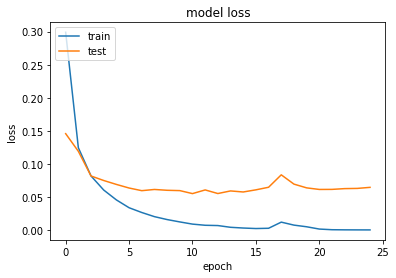

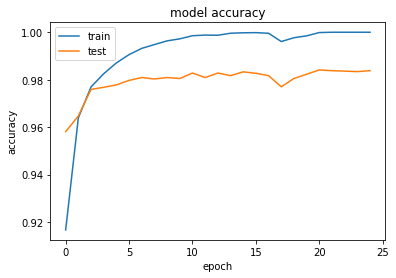

In [8]:

# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()


### Lets see how the model worked against the "training" data set and the "test" data set.
The loss graph shows how well the "loss" is being minimized on the training and the validation loss is a average of the "loss" is against the 10,000 validation data set.


### the above diagram indicates that we are "over-fitting" => that the model's accuracy on the training set improves but against the test set, it doesn't improve at all
In fact, if you look at the train accuracy at the last epoch run, it is 100% !!

### Furthermore, the "loss" for the validation slowly creeps up while the "loss" for training goes down consistently.  This is another indication of an "over-fitting"

A model that has over-fit on the training data will not perform well against unseen data.  We should tried to remedy this.  One of the available "tricks" is to introduce a "Dropout" which randomly zeros out percentage of connection between the layers.

Let's train the model and see how well it performs. We have to train a bit longer.


In [9]:
model2 = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model2.add( keras.layers.Dense(512, input_shape=(784,), activation='relu'))
model2.add( keras.layers.Dropout(rate=0.5))

#output layer
model2.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()
#train the model with train data
fit_history2 = model2.fit(x_train_reshaped, y_hot_train,
  epochs=35 ,
  batch_size=200,
  validation_data=(x_test_reshaped,y_hot_test)
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 1s 18us/step - loss: 0.3689 - acc: 0.8933 - val_loss: 0.1673 - val_acc: 0.9499
Epoch 2/35
60000/60000 [==============================] - 1s 17us/step - loss: 0.1738 - acc: 0.9489 - val_loss: 0.1162 - val_acc: 0.9666
Epoch 3/35
60000/60000 [==============================] - 1s 17us/step - los

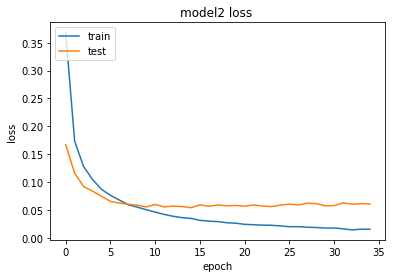

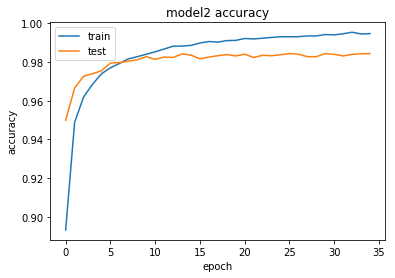

In [10]:

# show procession of training...
plt.plot(fit_history2.history['loss'])
plt.plot(fit_history2.history['val_loss'])

plt.title('model2 loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history2.history['acc'])
plt.plot(fit_history2.history['val_acc'])

plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()


#### the model still over fits a little, but it is A LOT better than when no Dropout was used

The validation accuracy is about 0.984x to 0.985x. It does not improve

#### Let's plot what's call confusion matrix that shows the mismatched matrix


In [11]:
# predict for my test data
predictions = model2.predict(x_test_reshaped)

my_matrix = np.zeros( (10,10), dtype='int')

# count of good guesses
count_matrix = np.zeros( (10,), dtype='int')
good_matrix = np.zeros( (10,), dtype='int')

# iterate through 10,000 test data
for i in range(10000):
    count_matrix[y_test[i]] +=1
    guess = np.argmax(predictions[i])
    if guess == y_test[i]:
        good_matrix[guess] +=1
    else:
        # increment [expected][guess] matrix
        my_matrix[y_test[i]][guess] += 1

# show good matrix
print('Good guesses:')
for i in range(10):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)


Good guesses:
match count for: 0 = 972 / 980 ( 99.18 %)
match count for: 1 = 1128 / 1135 ( 99.38 %)
match count for: 2 = 1015 / 1032 ( 98.35 %)
match count for: 3 = 996 / 1010 ( 98.61 %)
match count for: 4 = 964 / 982 ( 98.17 %)
match count for: 5 = 874 / 892 ( 97.98 %)
match count for: 6 = 943 / 958 ( 98.43 %)
match count for: 7 = 1011 / 1028 ( 98.35 %)
match count for: 8 = 954 / 974 ( 97.95 %)
match count for: 9 = 987 / 1009 ( 97.82 %)



Confusion Matrix


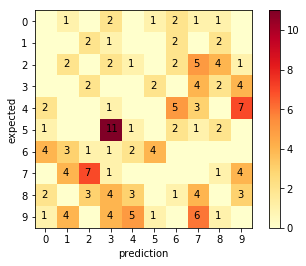

In [12]:
print('\nConfusion Matrix')

fig = plt.figure()
plt.xticks( range(10))
plt.yticks( range(10))

for y in range(10):
    for x in range(10):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix, cmap='YlOrRd')
plt.colorbar()
plt.show()
plt.close()

The matrix shows that number 4s are confused as 9s. Let's just plot these problematic 4ss
You can change the two numbers and click "Run" to view the other "confused" predictions

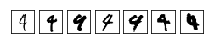

In [16]:
non_match_list = []
for i in range(10000):
    if y_test[i] == 4:
        guess = np.argmax(predictions[i])
        if guess == 9:
            non_match_list.append(i)

fig = plt.figure( figsize = (10,2))

for i in range(len(non_match_list)):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = non_match_list[i]
    plt.imshow(x_test[index], cmap='gray_r')
plt.show()
plt.close()
